In [2]:
from text2image_finetune import convert_safetensor_to_diffusion, train_text_to_image_lora, retrieve_class_images, create_metadata_csv_and_push_to_hub, generate_test_images
from text2image_gpt_assist import generate_images

STEP 1: CONVERT A DOWNLOADED SAFETENSOR MODEL CHECKPOINT INTO DIFFUSERS FORMAT CHECKPOINT

In [2]:
convert_safetensor_to_diffusion('deliberate_v2.safetensors', 'test_conversion3')

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.13.self_attn.v_proj.bias', 'vision_model.encoder.layers.18.self_attn.out_proj.weight', 'vision_model.encoder.layers.20.mlp.fc2.weight', 'vision_model.encoder.layers.1.layer_norm2.bias', 'vision_model.encoder.layers.1.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.layer_norm2.bias', 'vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.encoder.layers.1.mlp.fc1.bias', 'vision_model.encoder.layers.20.layer_norm2.bias', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.14.mlp.fc1.bias', 'vision_model.embeddings.position_ids', 'vision_model.encoder.layers.13.self_attn.q_proj.bias', 'vision_model.encoder.layers.19.layer_norm2.bias', 'vision_model.encoder.layers.10.self_attn.q_proj.weight', 'vision_model.encoder.layers.6.self_attn.v_proj.weight', 'vision_model.encoder.layers.2.self_attn.q_p

global_step key not found in model
Conversion complete.


STEP 2: FINETUNE A DIFFUSERS FORMAT MODEL WITH ADDITIONAL IMAGES

In [ ]:
#RETRIEVE IMAGES WITH CORRESPONDING DESCRIPTIONS
retrieve_class_images("simpsons", "/Users/megan.bultema/Documents/image_diffusion/hackingtogether-megan/real_reg/AnselAdams", 20)

In [ ]:
#FORMAT RETRIEVED IMAGES INTO A HUGGINGFACE DATASET AND PUSH TO HF
create_metadata_csv_and_push_to_hub('/Users/megan.bultema/Documents/image_diffusion/hackingtogether-megan/real_reg/AnselAdams')

In [ ]:
#FINETUNE DIFFUSERS CHECKPOINT WITH IMAGES IN HF DATASET USING LORA
train_text_to_image_lora("./converted_model_deliberate","megantron/AnselAdams","deliberate_AnselAdams")

In [ ]:
#TEST NEWLY FINE-TUNED MODEL
p = """ Mountains style Ansel Adams photography octane render, ultra detailed, wide angle full body, 8k, ultra-detailed, intricate, """
n = """nrealfixer, nfixer, nartfixer, illustration, drawing, 3d, b&w, (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation"""
generate_test_images("./deliberate_AnselAdams", 5, p, n)

STEP 3: CREATE IMAGES USING ORIGINAL AND FINE-TUNED MODEL. LEVERAGES CHAT-GPT TO CREATE PROMPTS AND NEGATIVE PROMPTS.

In [3]:
#Generate images using the Stable Diffusion model "converted_model_deliberate" as original and provided fine-tuned model for comparison, given a user input string as a starting prompt to be expanded upon by Chat-GPT.
image_base, image_ft = generate_images("./deliberate_simpsons",'Homer Simpson eating a donut', num_images=5, with_examples=True)

/Users/megan.bultema/opt/anaconda3/envs/diffpy2/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


test_images/donut_devourer_2


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


The image is completely black.
NSFWException caught. Retrying...


  0%|          | 0/50 [00:00<?, ?it/s]

Image 0 is NSFW and could not be generated after 3 retries.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

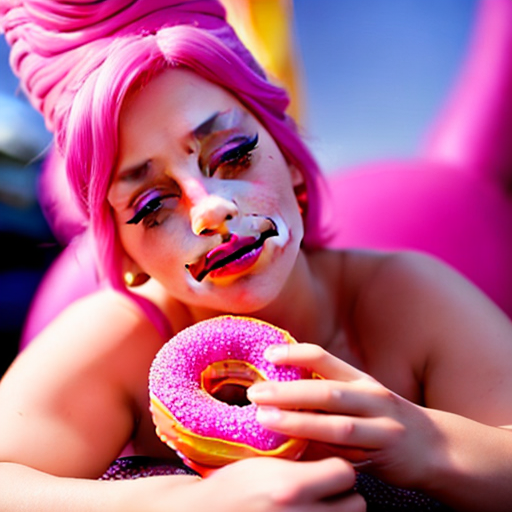

In [4]:
image_base

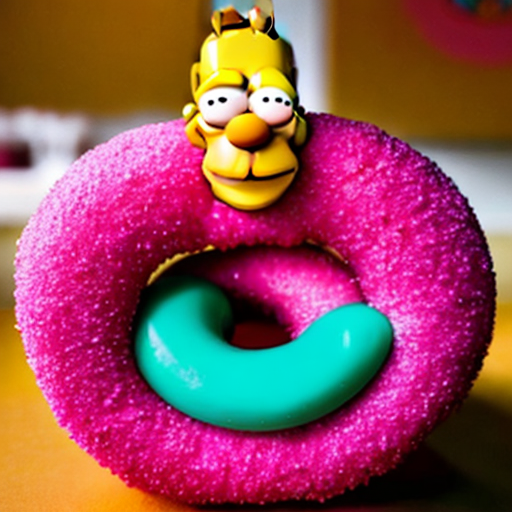

In [5]:
image_ft

ToDo
There are some hard coded paths to remove and standardize (path to diffusers scripts, path to original model)
More testing with ChatGPT prompts to get better image prompts to result in better images
Scrape original model examples for example input into chatgpt prompt generation
The NSFW exception only appears to retry once instead of 3x
Create init file to make into a package

